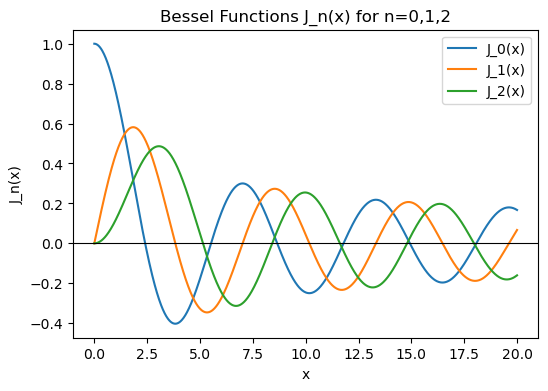

First 5 positive roots of J_0(x):
  Root #1: x = 2.404826
  Root #2: x = 5.520078
  Root #3: x = 8.653728
  Root #4: x = 11.791534
  Root #5: x = 14.930918

First 5 positive roots of J_1(x):
  Root #1: x = 3.831706
  Root #2: x = 7.015587
  Root #3: x = 10.173468
  Root #4: x = 13.323692
  Root #5: x = 16.470630

First 5 positive roots of J_2(x):
  Root #1: x = 5.135622
  Root #2: x = 8.417244
  Root #3: x = 11.619841
  Root #4: x = 14.795952
  Root #5: x = 17.959819



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn  # jn(n, x) = J_n(x)
from scipy.optimize import brentq

def find_bessel_roots(n, num_roots=5, x_max=50):
    """
    Finds the first `num_roots` positive roots of J_n(x) up to x = x_max
    using a bracket-search + brentq.
    """
    x_vals = np.linspace(0.001, x_max, 10000)  # Dense grid + skip x=0
    f_vals = [jn(n, xv) for xv in x_vals]

    roots = []
    for i in range(len(x_vals)-1):
        v0, v1 = f_vals[i], f_vals[i+1]

        # Check for opposite signs:
        if v0 * v1 < 0:
            try:
                # bracket the zero
                r = brentq(lambda xx: jn(n, xx), x_vals[i], x_vals[i+1])
                roots.append(r)
            except ValueError:
                pass

        # Stop if we found enough
        if len(roots) >= num_roots:
            break

    return roots

def main():
    x_plot = np.linspace(0, 20, 1000)

    # Plot J_0, J_1, J_2 from 0..20
    plt.figure(figsize=(6,4))
    for n in [0,1,2]:
        plt.plot(x_plot, jn(n, x_plot), label=f"J_{n}(x)")
    plt.axhline(0, color='black', lw=0.8)
    plt.xlabel("x")
    plt.ylabel("J_n(x)")
    plt.title("Bessel Functions J_n(x) for n=0,1,2")
    plt.legend()
    plt.show()

    # Print the first 5 positive roots for each n
    for n in [0,1,2]:
        roots_n = find_bessel_roots(n, num_roots=5, x_max=50)
        print(f"First 5 positive roots of J_{n}(x):")
        if roots_n:
            for i, r in enumerate(roots_n, 1):
                print(f"  Root #{i}: x = {r:.6f}")
        else:
            print("  None found!")
        print()

if __name__ == "__main__":
    main()


# Took about 5 mins to run lol